In [14]:
from sim_helpers import *
from plotting_helpers import *

Economy 4 is the master econmy.
The Master Economy has degree 29
The number of total links is: 141
Average degree of the network: 5.64


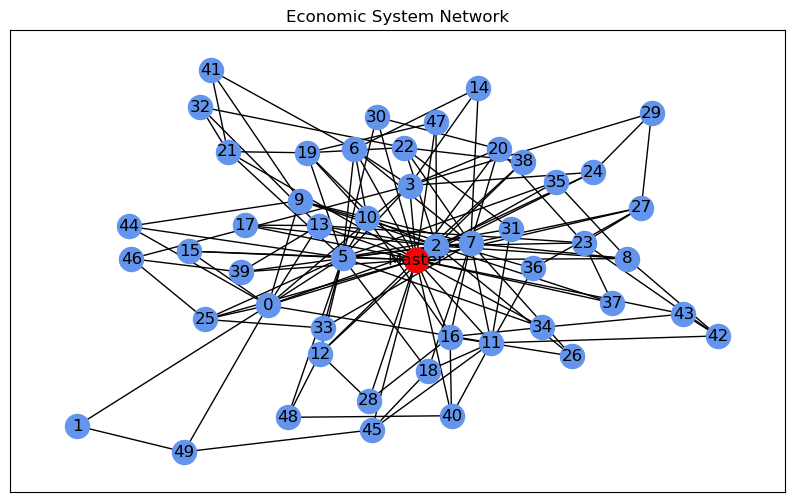

In [22]:
num_economies = 50 # Number of nodes
m = 2 # Number of edges to attach from a new node to existing nodes

G = initialize_sim(num_economies, m)

Now Gooing to test a chatoic buisiness cycles model (10.3.4)
Flow Equations:
$$ \dot{V} = c_3 B − c_2 V − c_1 y $$
$$ \dot{B} = \frac{r}{c_3} y ( 1 − y ) $$
$$ \dot{y} = V$$

y : sales

B : inventory stocks

V : output

$ c_3 = \frac{r}{m} = \frac{1}{ba_2} > 0 \quad c_2 = \frac{ba_1 - \tau}{ba_2} \quad c_1 = \frac{1}{a_2} > 0$


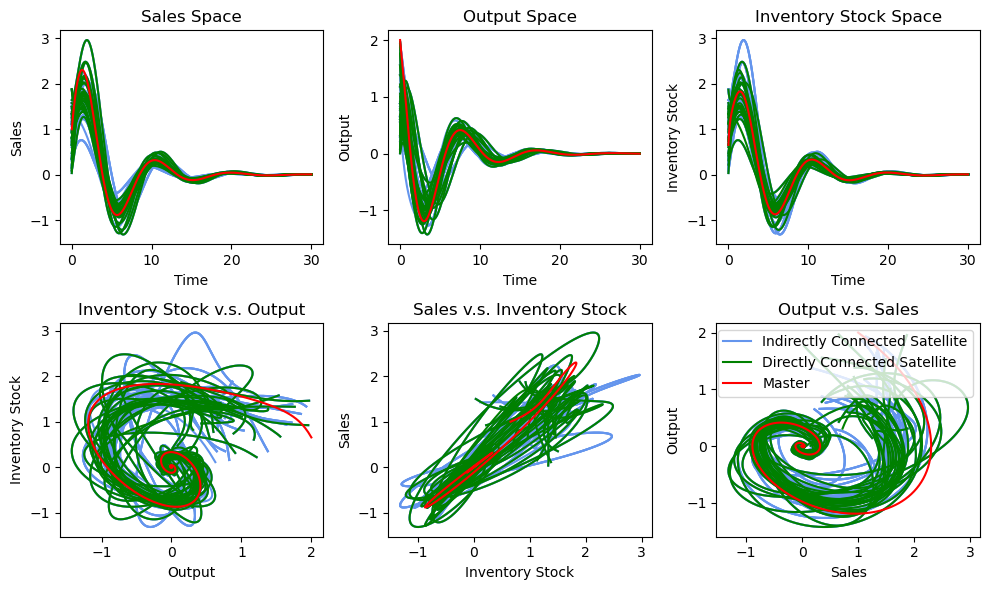

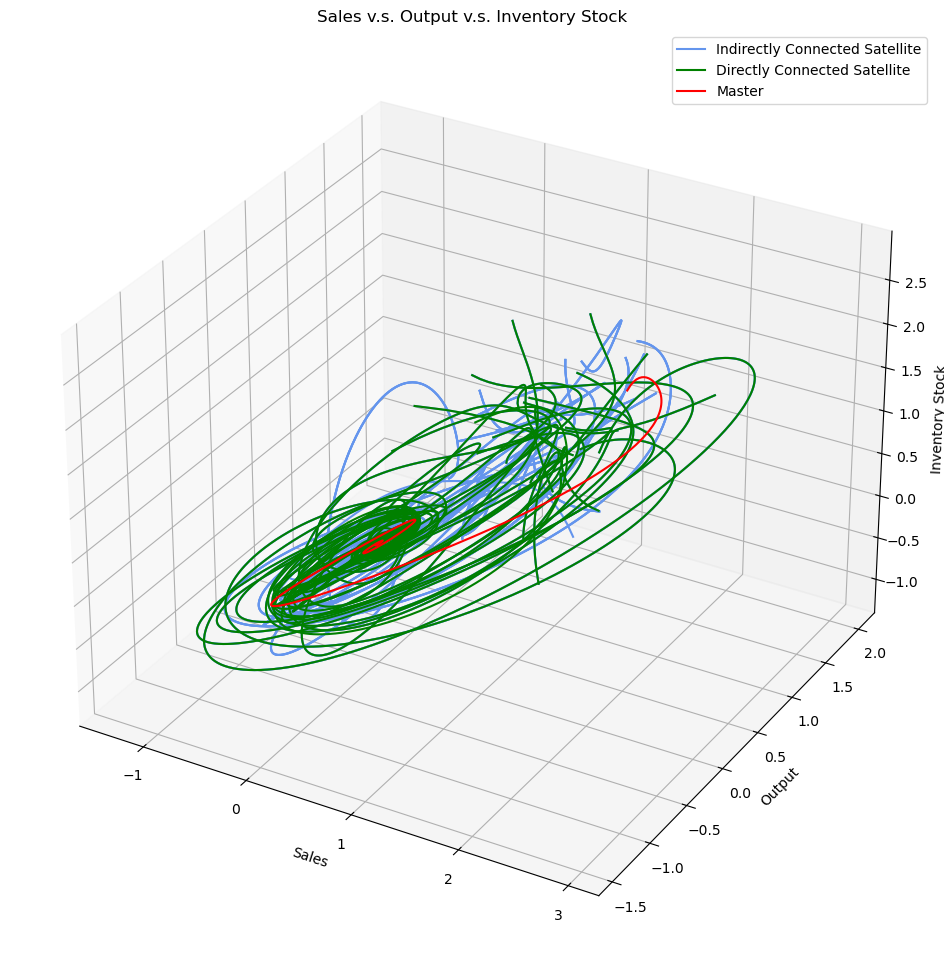

In [23]:
# Flow Equations
# V' = c_3 * B − c_2 * V − c_1 * y
# B' = r/c_3 * y * ( 1 − y )
# y' = V
# let c_3 -> k, c_2 -> m, c_1 -> l, r -> c
# define simulation time parameters
total_time = 30
t_divisions = 1000

# define master economy conditions
g = 0.5 # base coupling strength

# Defined by the book
# k = 1/(b*a2)
# m = (ba1 - tau)/(ba2)
# l = 1/a2
# c = mm/(ba2)
# c1 = 1, c2 = 0.4, and c3 = 0.5
b = 0.1
a2 = 0.8
a1 = 0.5
tau = 0.2
mm = 0.7

# c = mm / (b*a2)
# l = 1/a2
# k = 1/(b*a2)
# m = (b*a1 - tau)/(b*a2)

l = 1
m = 0.4
k = 0.5
c = 0.4

x0= 1
v0= 2
y0= 2


# run the simulation
data, times = run_chaos_simulation(G, total_time, t_divisions, x0=x0, v0=v0, y0=y0, g=g, param_perturb = 0.8,
                             c=c, l=l, k=k, m=m, ode_func=chaos_model)

chaos_plt(G, data, times)